In [3]:
#import requests
#import urllib.request
#import time
#from bs4 import BeautifulSoup

#url = 'https://apps.apple.com/us/app/airbnb/id401626263#see-all/reviews'
#response = requests.get(url)

In [212]:
pwd

'/Users/jmagnus'

In [8]:
#import requests
#from bs4 import BeautifulSoup
#import json
#from pandas import DataFrame as df

In [13]:
## this didn't work, ignore 
page = requests.get("https://apps.apple.com/us/app/airbnb/id401626263#see-all/reviews")
soup = BeautifulSoup(page.text, 'html.parser')

page = soup.find_all('p')

In [19]:
# import app-store-scraper // this is what i'm running
!pip3 install app-store-scraper

     |████████████████████████████████| 58 kB 7.5 MB/s eta 0:00:011
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


In [204]:
from app_store_scraper import AppStore
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


airbnb = AppStore(country="us", app_name="airbnb")
airbnb.review(how_many=300)



2020-11-17 22:30:05,917 [INFO] Base - Searching for app id
2020-11-17 22:30:07,721 [INFO] Base - Initialised: AppStore('us', 'airbnb', 401626263)
2020-11-17 22:30:07,722 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/airbnb/id401626263
2020-11-17 22:30:09,992 [INFO] Base - [id:401626263] Fetched 300 reviews (300 fetched in total)


In [188]:
airbnb_r = airbnb.reviews
airbnb_r

[{'isEdited': False,
  'title': 'Loving Airbnb',
  'review': 'We used Airbnb during our recent holiday in Kona, HI and stayed in 3 different private units. Each was wonderful and had everything we needed including the loan of beach chairs, beach towels and umbrellas. We didn’t cook, but each unit was well appointed with everything we would need and next time we will enjoy creating our own meals at the units and eat out less. We enjoyed visiting briefly with each owner, they were all really nice but not intrusive at all. We went on two excursions recommended and booked through Airbnb. They were great and good value. I would recommend the Wild Dolphin & Snorkeling adventure with Captain Chase and the Local Brews & Poke Flights with Lottie and a wonderful chef and fun bartender at a beautiful golf course. They were both awesome and each was a small group of 5-6 people allowing us to ask our hosts questions and visit with the other guests. We will likely use Airbnb more often, it was super

In [23]:
# install wordcloud
#!conda install -c conda-forge wordcloud==1.8.1 --yes

# import package and its set of stopwords
#from wordcloud import WordCloud, STOPWORDS

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/jmagnus/opt/anaconda3

  added / updated specs:
    - wordcloud==1.8.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h7e3306e_0         170 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-1_cp38
  wordcloud          conda-forge/osx-64::wordclou

In [189]:
import pandas as pd 

airbnb_r = pd.DataFrame.from_dict(airbnb.reviews)
airbnb_r.dtypes

airbnb_r.review.apply(str)

review = airbnb_r['review']

review.apply(str)

airbnb_r.head()

airbnb_r[["rating", "title","review"]].head()

df = airbnb_r.sort_values(['rating'], ascending=True, axis=0)

df['rating'].value_counts()

1    175
5     53
3     29
4     27
2     16
Name: rating, dtype: int64

In [196]:
#creating dataframe for the reviews 3 stars or lower 

df = airbnb_r.sort_values(['rating'], ascending=True, axis=0).head(124)

df.head(10)

,isEdited,title,review,userName,rating,date
149,False,Their customer service is a total 🗑🔥,I had a place booked four months out (during g...,jdog6,1,2020-09-17 17:29:47
159,False,Cancellation policy is ridiculous!,The app is ok but this is about their strict c...,orange3232,1,2019-05-20 14:43:30
162,False,Glitches and non transparency,Throughout the years I have been a very loyal ...,Superussr,1,2020-07-14 05:41:45
164,False,Clueless about Customer Service,"I used to like Airbnb, until an issue happened...",Exploring Mermaid,1,2019-02-15 17:06:02
165,False,Do not use this app if you are a minority,Airbnb does not care if you are a person of co...,Britt Bradley,1,2020-09-16 07:04:41
167,False,Terriable support service for cancelations due...,As an Airbnb host and traveler I used to be a ...,marykayd,1,2020-07-26 22:11:08
170,False,Horrible Customer Service,"Before you use Airbnb, know that you cannot co...",V'licious,1,2018-01-02 14:08:49
172,False,Airbnb left me high and dry.,"Its a good experience when thing go right, but...",Jqdang,1,2019-02-15 05:29:49
174,False,Horrible customer service,I recently booked a trip to Peru for the month...,12334535??&6,1,2019-05-03 03:59:20
175,False,Zero stars,Stayed at Jay Kollmansberger and Robin Befus c...,raekay02,1,2020-04-02 02:13:27


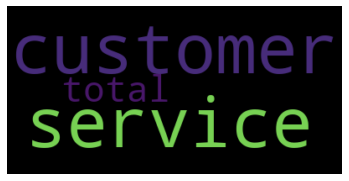

In [197]:
# reference https://www.datacamp.com/community/tutorials/wordcloud-python
#sample with first review 
text = df.title[149]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [199]:
#convert to one large text string from all reviews 
text = " ".join(title for title in df.title)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3633 words in the combination of all review.


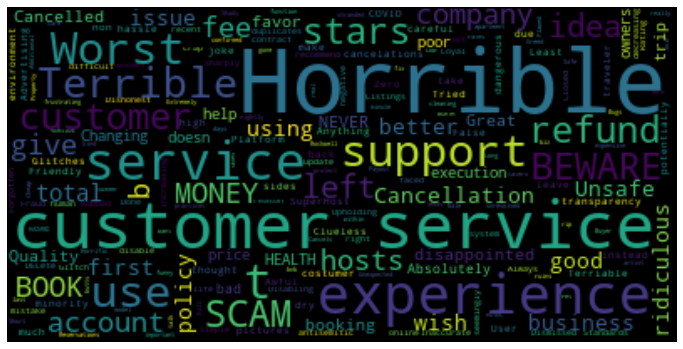

In [200]:
#update stop words 
stopwords = set(STOPWORDS)
stopwords.update(["unit", 'stay', 'reservation', 'Airbnb', 'airbnb', 'everything', 'will', 'host', 'app', 'guest', 'one', 'said', 'time', 'day', 'place', 've', 'dont', 'didnt', 'don t', 'don', 'air', 'm', 'u', 's', 'us'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# configure image 
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(14) # set height
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

In [211]:
# apply a mask for image just for the kicks

pwd

NameError: name 'pwd' is not defined

In [194]:
df_s = airbnb_r['rating'].value_counts().sort_values(ascending=True)
df_s.head()

2     16
4     27
3     29
5     53
1    175
Name: rating, dtype: int64

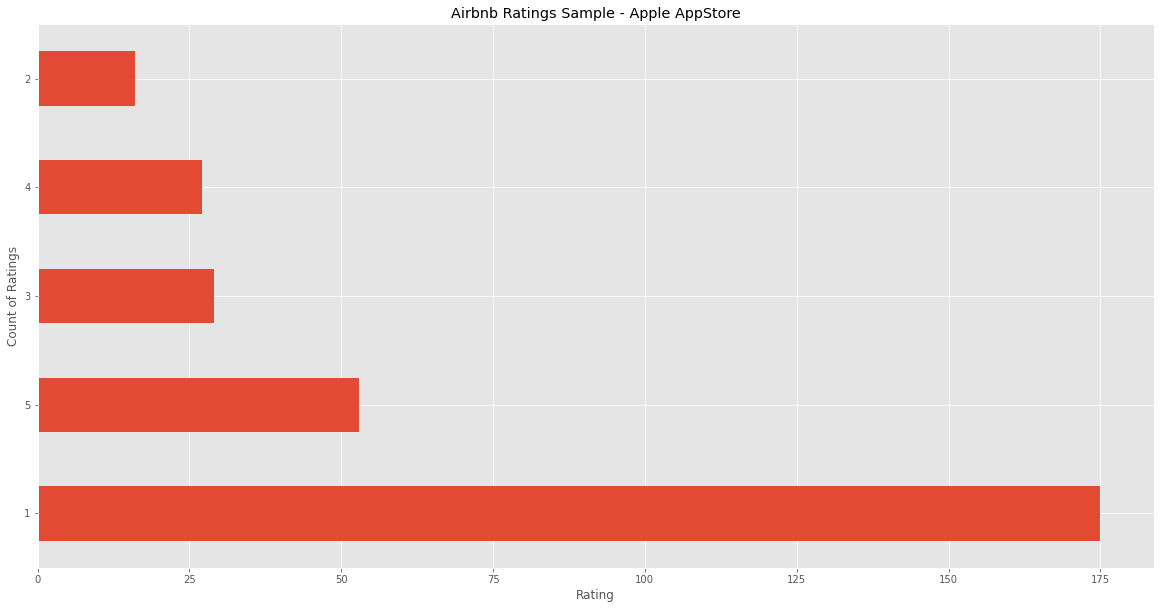

In [195]:
df_s = airbnb_r['rating'].value_counts()

df_s.plot(kind='barh', figsize=(20, 10),)

plt.title('Airbnb Ratings Sample - Apple AppStore')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')

plt.show()


In [62]:
wordcount.plot(kind='barh')



ValueError: 
200+$$
    ^
Expected end of text, found '$'  (at char 4), (line:1, col:5)

<Figure size 432x288 with 1 Axes>